Usaremos a api do Youtube disponibilizada pelo Google.

**API** é uma interface de programação que possibilita a disponibilização dos dados da empresa em questão. São estabelecidos então **endpoints** para que possamos consultar determinados dados especificada pela empresa.

Link da [documentação](https://developers.google.com/youtube/v3/getting-started?hl=pt-br).

In [80]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from datetime import datetime

print('Setup completo!')

Setup completo!


In [2]:
youTubeApiKey = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [4]:
youtube = build('youtube', 'v3', developerKey=youTubeApiKey)

In [9]:
# Extraindo videos de uma playlist do YT da Nath Araujo

playlistId = 'PLOISQg8qoTgWJnHJPPH0KuBuxFaMzphF-'
playlistName = '♡DESENHOS'
nextPage_token = None

In [ ]:
# while True:
#     res = youtube.playlistItems().list(part='snippet', playlistId=playlistId, maxResults=50, pageToken=nextPage_token).execute()
#     playlist_videos += res['items']

#     nextPage_token = res.get('nextPageToken')

#     if nextPage_token in None:
#         break

In [23]:
playlist_videos = []

res = youtube.playlistItems().list(part='snippet', playlistId=playlistId, maxResults=50).execute()
playlist_videos = res['items']

In [24]:
# Número total de vídeos na playlist
len(playlist_videos)

50

In [25]:
playlist_videos

[{'kind': 'youtube#playlistItem',
  'etag': 'pYNKHn7ockxYEjhxo-_slmNJFEo',
  'id': 'UExPSVNRZzhxb1RnV0puSEpQUEgwS3VCdXhGYU16cGhGLS40QTY5NjQzQkQzMjgwNjhD',
  'snippet': {'publishedAt': '2022-08-06T13:14:13Z',
   'channelId': 'UCG7QZRBje4wS-gyj_AlFdFg',
   'title': 'COMO DESENHAR CORPO FEMININO | Nath Araújo',
   'description': '• Se inscreva no canal ♡\n• contato@natharaujo.com\n\nINSTAGRAM: http://instagram.com/nanaths\nTWITTER: http://twitter.com/nanaths\nFACEBOOK: https://www.facebook.com/natharaujoart',
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/hqdefault.jpg',
     'width': 480,
     'height': 360},
    'standard': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/sddefault.jpg',
     'width': 640,
     'height': 480},
    'maxres': {'url'

In [29]:
# extrair os ids do videos
# como exemplo extraindo o id do primeiro video
playlist_videos[0]['snippet']['resourceId']['videoId']

'lb1KiMhNlsk'

In [33]:
video_ids = []

for video in playlist_videos:
    video_id = video['snippet']['resourceId']['videoId']
    video_ids.append(video_id)

len(video_ids)
#map(lambda x: x['snippet']['resourceId']['videoId'], playlist_videos )

50

In [35]:
type(video_ids)

list

A ideia é utilizar a lista de ids para fazer uma consulta no endpoint de videos da nossa API.

In [38]:
# Armazenando essa consulta em uma lista de estatisticas
stats = []

for v_id in video_ids:
    res = youtube.videos().list(part='statistics', id=v_id).execute()
    stats += res['items']


In [39]:
# Dados estraidos do youtube
stats

[{'kind': 'youtube#video',
  'etag': 'RJMX1ME9pbhUyp0D7wwA4iTCJmE',
  'id': 'lb1KiMhNlsk',
  'statistics': {'viewCount': '1422836',
   'likeCount': '69315',
   'favoriteCount': '0',
   'commentCount': '1397'}},
 {'kind': 'youtube#video',
  'etag': 'mucF8xrmQxvM8KLxgsCVckBRtoQ',
  'id': 'lMNCOyfag4Q',
  'statistics': {'viewCount': '736921',
   'likeCount': '41530',
   'favoriteCount': '0',
   'commentCount': '2121'}},
 {'kind': 'youtube#video',
  'etag': 'GiVnfaBNahbCeCUvx0lQqs2mszU',
  'id': 'F1Jra8sjXoQ',
  'statistics': {'viewCount': '628204',
   'likeCount': '35768',
   'favoriteCount': '0',
   'commentCount': '597'}},
 {'kind': 'youtube#video',
  'etag': '9fr-uqKONI6csN33IhC76gTA0pw',
  'id': 'fZEhiXpLVrc',
  'statistics': {'viewCount': '513192',
   'likeCount': '26233',
   'favoriteCount': '0',
   'commentCount': '580'}},
 {'kind': 'youtube#video',
  'etag': 's9dlyAqzxHTS1JSjGm1lPQZkyh0',
  'id': 'NQI74V6X4aM',
  'statistics': {'viewCount': '448547',
   'likeCount': '25548',
   'f

### Selecionando informações para construir um dataset

In [48]:
playlist_videos[0]

{'kind': 'youtube#playlistItem',
 'etag': 'pYNKHn7ockxYEjhxo-_slmNJFEo',
 'id': 'UExPSVNRZzhxb1RnV0puSEpQUEgwS3VCdXhGYU16cGhGLS40QTY5NjQzQkQzMjgwNjhD',
 'snippet': {'publishedAt': '2022-08-06T13:14:13Z',
  'channelId': 'UCG7QZRBje4wS-gyj_AlFdFg',
  'title': 'COMO DESENHAR CORPO FEMININO | Nath Araújo',
  'description': '• Se inscreva no canal ♡\n• contato@natharaujo.com\n\nINSTAGRAM: http://instagram.com/nanaths\nTWITTER: http://twitter.com/nanaths\nFACEBOOK: https://www.facebook.com/natharaujoart',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/hqdefault.jpg',
    'width': 480,
    'height': 360},
   'standard': {'url': 'https://i.ytimg.com/vi/lb1KiMhNlsk/sddefault.jpg',
    'width': 640,
    'height': 480},
   'maxres': {'url': 'https://i.ytimg.c

In [46]:
video_title = []
for video in playlist_videos:
    vt = video['snippet']['title']
    video_title.append(vt)

url_thumbnails = []
for video in playlist_videos:
    ut = video['snippet']['thumbnails']['high']['url']
    url_thumbnails.append(ut)

published_date = []
for video in playlist_videos:
    pdate = video['snippet']['publishedAt']
    published_date.append(pdate)

video_description = []
for video in playlist_videos:
    vd = video['snippet']['description']
    video_description.append(vd)

videoId = []
for video in playlist_videos:
    vId = video['snippet']['resourceId']['videoId']
    videoId.append(vId)
    

In [52]:
stats[0]['statistics']

{'viewCount': '1422836',
 'likeCount': '69315',
 'favoriteCount': '0',
 'commentCount': '1397'}

In [53]:
liked = []
for video_stats in stats:
    like = video_stats['statistics']['likeCount']
    liked.append(like)

view = []
for video_stats in stats:
    viewer = video_stats['statistics']['viewCount']
    view.append(viewer)

fav = []
for video_stats in stats:
    favorite = video_stats['statistics']['favoriteCount']
    fav.append(favorite)

comments = []
for video_stats in stats:
    commies = video_stats['statistics']['commentCount']
    comments.append(commies)

In [55]:
# tratativa da data

extraction_date = [str(datetime.now())]*len(video_ids)

In [56]:
playlist_df = pd.DataFrame({'title':video_title,
                            'url_thumbnails':url_thumbnails,
                            'published_date':published_date,
                            'extraction_date':extraction_date,
                            'video_description':video_description,
                            'videoId':videoId,
                            'liked':liked,
                            'view':view,
                            'fav':fav,
                            'comments':comments})
playlist_df.head()

,title,url_thumbnails,published_date,extraction_date,video_description,videoId,liked,view,fav,comments
0,COMO DESENHAR CORPO FEMININO | Nath Araújo,https://i.ytimg.com/vi/lb1KiMhNlsk/hqdefault.jpg,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,• Se inscreva no canal ♡\n• contato@natharaujo...,lb1KiMhNlsk,69315,1422836,0,1397
1,MATERIAL CARO x BARATO | comparando marcadores,https://i.ytimg.com/vi/lMNCOyfag4Q/hqdefault.jpg,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,♡ Produtos que eu amo e indico: https://www.li...,lMNCOyfag4Q,41530,736921,0,2121
2,DESENHE UM ROSTO COMIGO | Nath Araújo,https://i.ytimg.com/vi/F1Jra8sjXoQ/hqdefault.jpg,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,♡ Produtos que eu amo e indico: https://www.li...,F1Jra8sjXoQ,35768,628204,0,597
3,DESENHO COMPLETO PARTE 1 | LÁPIS | Nath Araújo,https://i.ytimg.com/vi/fZEhiXpLVrc/hqdefault.jpg,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,♡ Produtos que eu amo e indico: https://www.li...,fZEhiXpLVrc,26233,513192,0,580
4,"Desenhando em 30 MINUTOS, 3 MINUTOS e 30 SEGUN...",https://i.ytimg.com/vi/NQI74V6X4aM/hqdefault.jpg,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,Aceitei o desafio de fazer um desenho em 30 mi...,NQI74V6X4aM,25548,448547,0,641


#### Analise de Dados dos primeiros 50 vídeos da playlist 'DESENHO' da Nath Araujo

##### 1. Formulação do Problema

O Youtube é um importante meio de comunicação gratuito. Além de disponibilizar uma grande gama de vídeos segmentado por assuntos e por perfis de usuários ele possibilita a globalização de conteúdo de fontes diversas. Após o bum de usuários e conteúdos dos anos 10 numerosos artistas migraram e se adptaram a plataforma afim de difundir seus produtos, incluimos aqui os influenciadores.

Nath Araújo entra nesse universo como youtuber, artista, ilustradora, escritora e criadora de conteúdo digital sobre moda e beleza. 

Além de fã e admiradora da sua arte eu consumo os seus videos e tenho interesse em aplicar o aprendizado desenvolvido nesse notebook com o objetivo final de identificar algum padrão nos dados públicos de seus vídeos.

Fonte da Playlist: https://youtube.com/playlist?list=PLOISQg8qoTgWJnHJPPH0KuBuxFaMzphF-


💗 [Instagram da Nanaths](https://www.instagram.com/nanaths/) 💗

Glossário do banco de dados:

* title: título do vídeo do youtube
* url_thumbnails: endereço das URLs pra miniaturas
* published_date: data ehora de publicação
* extraction_date: data e hora da extração
* video_description: descrição
* videoId: dígito identificador
* liked: total de reações positivas (likes)
* view: total de visualização
* fav: total de favoritados
* comments: total de comentários

In [57]:
playlist_df.columns

Index(['title', 'url_thumbnails', 'published_date', 'extraction_date',
       'video_description', 'videoId', 'liked', 'view', 'fav', 'comments'],
      dtype='object')

In [60]:
# Das variáveis que pre-selecionamos sigo com apenas uma variáel do tipo nominal (title), duas oridínarias (published_date e extraction_date) e as demais do tipo discreto. 
df = playlist_df[['title','published_date','extraction_date','liked','view','fav','comments']]
df

,title,published_date,extraction_date,liked,view,fav,comments
0,COMO DESENHAR CORPO FEMININO | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,69315,1422836,0,1397
1,MATERIAL CARO x BARATO | comparando marcadores,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,41530,736921,0,2121
2,DESENHE UM ROSTO COMIGO | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,35768,628204,0,597
3,DESENHO COMPLETO PARTE 1 | LÁPIS | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,26233,513192,0,580
4,"Desenhando em 30 MINUTOS, 3 MINUTOS e 30 SEGUN...",2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,25548,448547,0,641
5,REFAZENDO UM DESENHO DE CRIANÇA | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,30804,424779,0,1085
6,"TESTANDO MARCADORES NOVOS (Copic, Flying Tiger...",2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,17965,413550,0,525
7,Meu PRIMEIRO DESENHO na mesa digitalizadora da...,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,23747,365788,0,507
8,DESENHA E FALA | TESTANDO MARCADORES | Nath Ar...,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,21536,353210,0,626
9,COMO EU DESENHO OLHOS | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,15542,341040,0,288


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            50 non-null     object
 1   published_date   50 non-null     object
 2   extraction_date  50 non-null     object
 3   liked            50 non-null     object
 4   view             50 non-null     object
 5   fav              50 non-null     object
 6   comments         50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB


In [64]:
df.dtypes

title              object
published_date     object
extraction_date    object
liked              object
view               object
fav                object
comments           object
dtype: object

In [69]:
df['liked'] = df['liked'].astype(int)
df['view'] = df['view'].astype(int)
df['fav'] = df['fav'].astype(int)
df['comments'] = df['comments'].astype(int)

C:\Users\ninam\AppData\Local\Temp\ipykernel_12844\1517716468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].astype(int)
C:\Users\ninam\AppData\Local\Temp\ipykernel_12844\1517716468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fav'] = df['fav'].astype(int)
C:\Users\ninam\AppData\Local\Temp\ipykernel_12844\1517716468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [70]:
df.dtypes

title              object
published_date     object
extraction_date    object
liked               int32
view                int32
fav                 int32
comments            int32
dtype: object

In [71]:
df[['liked','view','fav','comments']].describe()

,liked,view,fav,comments
count,50.000000,5.000000e+01,50.0,50.000000
mean,21228.640000,2.745672e+05,0.0,682.800000
std,9847.086454,2.068559e+05,0.0,427.144529
min,9894.000000,1.492300e+05,0.0,188.000000
25%,14989.750000,1.717320e+05,0.0,320.250000
50%,20214.500000,2.031505e+05,0.0,591.000000
75%,23538.500000,2.919640e+05,0.0,909.500000
max,69315.000000,1.422836e+06,0.0,2121.000000


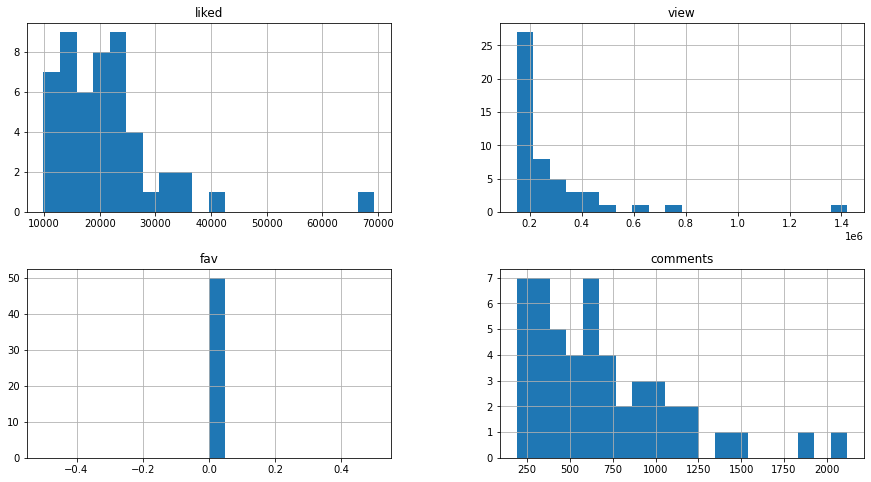

In [82]:
df.hist(bins=20, figsize=(15,8))
plt.show()

In [90]:
# Qual vídeo tem o maior número likes
df.loc[df['liked']==df['liked'].max()]

,title,published_date,extraction_date,liked,view,fav,comments
0,COMO DESENHAR CORPO FEMININO | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,69315,1422836,0,1397


In [77]:
# Qual vídeo tem o maior número de visualização
df.loc[df['view']==df['view'].max()]

,title,published_date,extraction_date,liked,view,fav,comments
0,COMO DESENHAR CORPO FEMININO | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,69315,1422836,0,1397


In [78]:
# Qual vídeo tem o maior número de visualização
df.loc[df['comments']==df['comments'].max()]

,title,published_date,extraction_date,liked,view,fav,comments
1,MATERIAL CARO x BARATO | comparando marcadores,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,41530,736921,0,2121


In [91]:
#Analisado faixas de likes
df['liked'].min(), df['liked'].max()

(9894, 69315)

In [108]:
# Total de likes entre 0 e 10k
df.loc[(df['liked'] >= 0)&(df['liked'] < 10000)]

,title,published_date,extraction_date,liked,view,fav,comments
41,RECARREGANDO MINHA CANETA COPIC | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,9997,162742,0,281
45,DESENHO COMPLETO PARTE 2 | PINTURA | Nath Araújo,2022-08-06T13:14:13Z,2023-06-20 20:27:25.274901,9894,154346,0,247


In [118]:
df.loc[(df['liked'] >= 0)&(df['liked'] < 10000)].shape[0],\
df.loc[(df['liked'] >= 10000)&(df['liked'] < 20000)].shape[0],\
df.loc[(df['liked'] >= 20000)&(df['liked'] < 30000)].shape[0],\
df.loc[(df['liked'] >= 30000)&(df['liked'] < 40000)].shape[0],\
df.loc[(df['liked'] >= 40000)&(df['liked'] < 50000)].shape[0],\
df.loc[(df['liked'] >= 50000)&(df['liked'] < 60000)].shape[0],\
df.loc[(df['liked'] >= 60000)&(df['liked'] < 70000)].shape[0]

(2, 22, 20, 4, 1, 0, 1)